# Final Term Project for DSC 540

Nicholas De Santos

In [76]:
#necessary set up
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import os
import urllib.request
import urllib.parse
import urllib.error
import requests
import ssl
import re

### Loading/Cleaning Datasets:

##### First dataset:

In [77]:
#getting data
bbdata = pd.read_csv("player_seasonstats.csv")

print(bbdata)

       Unnamed: 0    Year             Player  Pos   Age   Tm     G    GS  \
0               0  1950.0    Curly Armstrong  G-F  31.0  FTW  63.0   NaN   
1               1  1950.0       Cliff Barker   SG  29.0  INO  49.0   NaN   
2               2  1950.0      Leo Barnhorst   SF  25.0  CHS  67.0   NaN   
3               3  1950.0         Ed Bartels    F  24.0  TOT  15.0   NaN   
4               4  1950.0         Ed Bartels    F  24.0  DNN  13.0   NaN   
...           ...     ...                ...  ...   ...  ...   ...   ...   
24686       24686  2017.0        Cody Zeller   PF  24.0  CHO  62.0  58.0   
24687       24687  2017.0       Tyler Zeller    C  27.0  BOS  51.0   5.0   
24688       24688  2017.0  Stephen Zimmerman    C  20.0  ORL  19.0   0.0   
24689       24689  2017.0        Paul Zipser   SF  22.0  CHI  44.0  18.0   
24690       24690  2017.0        Ivica Zubac    C  19.0  LAL  38.0  11.0   

           MP   PER  ...    FT%    ORB    DRB    TRB    AST   STL   BLK   TOV  \
0     

In [78]:
# Step 1: Finding Missing Data and Fill
bbdata["Year"] = bbdata["Year"].fillna(method='ffill')
bbdata = bbdata.fillna(0)

# Step 2: Finding wrong data types
df_types = bbdata.dtypes
print(df_types)

Unnamed: 0      int64
Year          float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
GS            float64
MP            float64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%          float64
blanl         float64
OWS           float64
DWS           float64
WS            float64
WS/48         float64
blank2        float64
OBPM          float64
DBPM          float64
BPM           float64
VORP          float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB       

    In the code above we want to double check that the different data types make sense for the data that we have. As you can see we have three string varaibles: the players name, their position that they play and the team that they played for during that season. Every other varaible should be a numerical value and the output of the code confirms that so we have nothing to fix here.

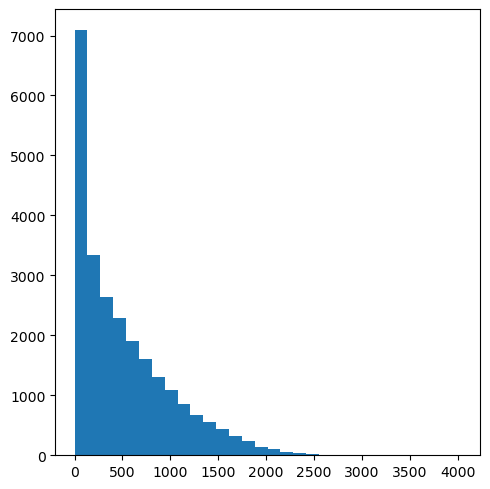

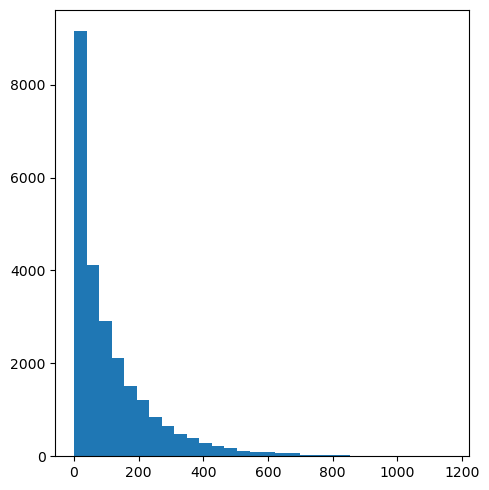

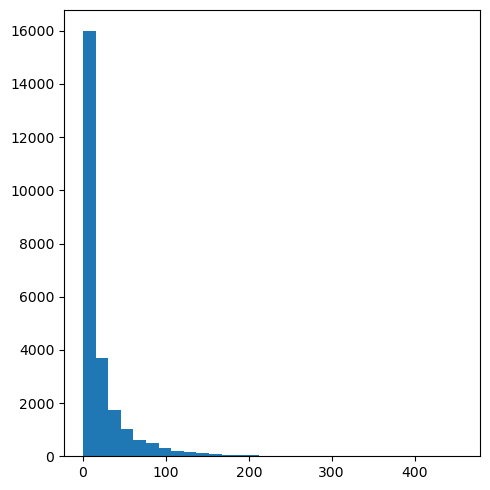

In [79]:
# Step 3: Finding Outliers
fig, axs = plt.subplots(1, 1,
                        figsize =(5, 5), 
                        tight_layout = True)
axs.hist(bbdata["PTS"], bins = 30)
plt.show()

fig, axs = plt.subplots(1, 1,
                        figsize =(5, 5), 
                        tight_layout = True)
axs.hist(bbdata["AST"], bins = 30)
plt.show()

fig, axs = plt.subplots(1, 1,
                        figsize =(5, 5), 
                        tight_layout = True)
axs.hist(bbdata["BLK"], bins = 30)
plt.show()

    In the code above we start looking at the distributions of different numerical values that are commonly used to evaluate a player's performance during a season. Specifically we looked at the points made during a season, assists made during each season and the amount of blocks each player made during a season. All of these ditributions are greatly skewed to the right but after investigating the large values online and crossreferencing them, these values are accurate and we conclude that there are no outliers that should be removed from the data.

In [81]:
# Step 4: Find duplicates
# find duplicate rows
duplicate_rows = bbdata.duplicated()
log_ints = [int(x) for x in duplicate_rows]
# print number of duplicate rows
print(sum(log_ints))

0


In [82]:
# Step 5: Separting data by decades for future analysis
bb50s = bbdata[(bbdata['Year'] <= 1959) & (bbdata['Year'] >= 1950)]
bb60s = bbdata[(bbdata['Year'] <= 1969) & (bbdata['Year'] >= 1960)]
bb70s = bbdata[(bbdata['Year'] <= 1979) & (bbdata['Year'] >= 1970)]
bb80s = bbdata[(bbdata['Year'] <= 1989) & (bbdata['Year'] >= 1980)]
bb90s = bbdata[(bbdata['Year'] <= 1999) & (bbdata['Year'] >= 1990)]
bb2000s = bbdata[(bbdata['Year'] <= 2009) & (bbdata['Year'] >= 2000)]
bb2010s = bbdata[(bbdata['Year'] <= 2019) & (bbdata['Year'] >= 2010)]
bb2020s = bbdata[(bbdata['Year'] <= 2023) & (bbdata['Year'] >= 2020)]

bbdata

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,0.0,0.0,0.0,...,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,0.0,0.0,0.0,...,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,0.0,0.0,0.0,...,0.698,0.0,0.0,0.0,140.0,0.0,0.0,0.0,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,0.0,0.0,0.0,...,0.559,0.0,0.0,0.0,20.0,0.0,0.0,0.0,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,0.0,0.0,0.0,...,0.548,0.0,0.0,0.0,20.0,0.0,0.0,0.0,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


##### Second dataset:

In [83]:
#getting data
wikiurl="https://en.wikipedia.org/wiki/NBA_Most_Valuable_Player_Award"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)

soup = BeautifulSoup(response.text, 'html.parser')

#looking for correct table
table_classes = {"class": ["sortable", "plainrowheaders"]}
wikitables = soup.findAll("table", table_classes)
wikitables

[<table class="wikitable plainrowheaders sortable" summary="Season (sortable), Player (sortable), Position (sortable), Nationality (sortable) and Team (sortable)">
 <tbody><tr>
 <th scope="col">Season
 </th>
 <th scope="col">Player
 </th>
 <th scope="col">Position
 </th>
 <th scope="col">Nationality
 </th>
 <th scope="col">Team
 </th></tr>
 <tr>
 <td><a href="/wiki/1955%E2%80%9356_NBA_season" title="1955–56 NBA season">1955–56</a>
 </td>
 <th scope="row" style="background-color:#FFFF99"><span data-sort-value="Pettit, Bob"><span class="vcard"><span class="fn"><a href="/wiki/Bob_Pettit" title="Bob Pettit">Bob Pettit</a></span></span></span>*
 </th>
 <td><a class="mw-redirect" href="/wiki/Power_forward_(basketball)" title="Power forward (basketball)">Power forward</a>
 </td>
 <td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upload.wikimedia.o

In [84]:
#getting table and converting to dataframe (mvp winners)
mvpdata = soup.find('table',{'class':"wikitable plainrowheaders sortable"})
mvpdata = pd.read_html(str(mvpdata))
mvpdata = pd.DataFrame(mvpdata[0])
mvpdata

,Season,Player,Position,Nationality,Team
0,1955–56,Bob Pettit*,Power forward,United States,St. Louis Hawks
1,1956–57 †,Bob Cousy*,Point guard,United States,Boston Celtics
2,1957–58,Bill Russell*,Center,United States,Boston Celtics (2)
3,1958–59,Bob Pettit* (2),Power forward,United States,St. Louis Hawks (2)
4,1959–60,Wilt Chamberlain*,Center,United States,Philadelphia Warriors
...,...,...,...,...,...
63,2018–19,Giannis Antetokounmpo^,Power forward,Greece,Milwaukee Bucks (4)
64,2019–20,Giannis Antetokounmpo^ (2),Power forward,Greece,Milwaukee Bucks (5)
65,2020–21,Nikola Jokić^,Center,Serbia,Denver Nuggets
66,2021–22,Nikola Jokić^ (2),Center,Serbia,Denver Nuggets (2)


In [85]:
#getting second table of data (multiple award winners)
multmvp = soup.find('table',{'class':"wikitable sortable"})
multmvp = pd.read_html(str(multmvp))
multmvp = pd.DataFrame(multmvp[0])
multmvp

,Awards,Player,Team(s),Years
0,6,Kareem Abdul-Jabbar,Milwaukee Bucks (3) / Los Angeles Lakers (3),"1971, 1972, 1974, 1976, 1977, 1980"
1,5,Bill Russell,Boston Celtics,"1958, 1961, 1962, 1963, 1965"
2,5,Michael Jordan,Chicago Bulls,"1988, 1991, 1992, 1996, 1998"
3,4,Wilt Chamberlain,Philadelphia Warriors (1) / Philadelphia 76ers...,"1960, 1966, 1967, 1968"
4,4,LeBron James,Cleveland Cavaliers (2) / Miami Heat (2),"2009, 2010, 2012, 2013"
5,3,Moses Malone,Houston Rockets (2) / Philadelphia 76ers (1),"1979, 1982, 1983"
6,3,Larry Bird,Boston Celtics,"1984, 1985, 1986"
7,3,Magic Johnson,Los Angeles Lakers,"1987, 1989, 1990"
8,2,Bob Pettit,St. Louis Hawks,"1956, 1959"
9,2,Karl Malone,Utah Jazz,"1997, 1999"


In [86]:
#1: Replacing Headers
dict = {'Player': 'Player',
        'Team': 'Team_Name'}
 
mvpdata.rename(columns=dict,
          inplace=True)

#Replacing headers for second dataframe
dict = {'Awards': 'Number_of_Awards'}
 
multmvp.rename(columns=dict,
          inplace=True)

In [87]:
#2: Incorrect Datatypes? Getting rid of unecessary characters
#team name - no numbers or parenthesis
mvpdata['Team_Name'] = mvpdata['Team_Name'].str.replace('[^\w\s.]+', '') #Philadelphia 76ers will now be the Philadelphia ers
mvpdata['Team_Name'] = mvpdata['Team_Name'].str.replace('\d+', '')

#player name - no numbers or punctuation
mvpdata['Player'] = mvpdata['Player'].str.replace('[^\w\s.]+', '')
mvpdata['Player'] = mvpdata['Player'].str.replace('\d+', '')

#3: Create New Column in first data frame (Hall of Famers - true or false)
# find row, col number of Kobe (last MVP winning Hall of Famer)
row, col = np.where(mvpdata == "Kobe Bryant")

mvpdata['Hall_of_Fame'] = mvpdata['Player'] #kobe the last hall of fame row number 52

mvpdata['Hall_of_Fame'].loc[:52] = True
mvpdata['Hall_of_Fame'].loc[53:] = False

# Step 4: Find duplicates

# find duplicate rows
duplicate_rows = mvpdata.duplicated()

log_ints = [int(x) for x in duplicate_rows]

# print number of duplicate rows
print("Number of Duplicates in First Dataframe: ", sum(log_ints))
multmvp

Number of Duplicates in First Dataframe:  0


C:\Users\nickx\AppData\Local\Temp\ipykernel_11680\1817867123.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  mvpdata['Team_Name'] = mvpdata['Team_Name'].str.replace('[^\w\s.]+', '') #Philadelphia 76ers will now be the Philadelphia ers
C:\Users\nickx\AppData\Local\Temp\ipykernel_11680\1817867123.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  mvpdata['Team_Name'] = mvpdata['Team_Name'].str.replace('\d+', '')
C:\Users\nickx\AppData\Local\Temp\ipykernel_11680\1817867123.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  mvpdata['Player'] = mvpdata['Player'].str.replace('[^\w\s.]+', '')
C:\Users\nickx\AppData\Local\Temp\ipykernel_11680\1817867123.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  mvpdata['Player'] = mvpdata['Player'].str.replace('\d+', '')


,Number_of_Awards,Player,Team(s),Years
0,6,Kareem Abdul-Jabbar,Milwaukee Bucks (3) / Los Angeles Lakers (3),"1971, 1972, 1974, 1976, 1977, 1980"
1,5,Bill Russell,Boston Celtics,"1958, 1961, 1962, 1963, 1965"
2,5,Michael Jordan,Chicago Bulls,"1988, 1991, 1992, 1996, 1998"
3,4,Wilt Chamberlain,Philadelphia Warriors (1) / Philadelphia 76ers...,"1960, 1966, 1967, 1968"
4,4,LeBron James,Cleveland Cavaliers (2) / Miami Heat (2),"2009, 2010, 2012, 2013"
5,3,Moses Malone,Houston Rockets (2) / Philadelphia 76ers (1),"1979, 1982, 1983"
6,3,Larry Bird,Boston Celtics,"1984, 1985, 1986"
7,3,Magic Johnson,Los Angeles Lakers,"1987, 1989, 1990"
8,2,Bob Pettit,St. Louis Hawks,"1956, 1959"
9,2,Karl Malone,Utah Jazz,"1997, 1999"


    Here we are looking for any duplicate rows in the data. It's pointless to look for duplicate names since many basketball players play over the course of different years/seasons hence a player's name might appear twice even though its a different season and other aspects might change. Here we only looked for entire duplicate rows and find that there aren't any complete duplicate rows to remove from our data. The second data table small enough to check for duplicated visually

In [88]:
#5: Adding Another Column, Championship Winning MVP - true or False
mvpdata['Winning_MVP'] = mvpdata['Season'] #new column using season data
mvpdata['Winning_MVP'] = mvpdata['Winning_MVP'].str.contains(pat = '†') #seasons with † denote player teams that won the 
                                                                        #champtionship that season
#changing true and false values to binary
#Changing Gender to Binary
mvpdata['Hall_of_Fame'] = mvpdata['Hall_of_Fame'].replace(False, 0)
mvpdata['Hall_of_Fame'] = mvpdata['Hall_of_Fame'].replace(True, 1)

mvpdata['Winning_MVP'] = mvpdata['Winning_MVP'].replace(False, 0)
mvpdata['Winning_MVP'] = mvpdata['Winning_MVP'].replace(True, 1)

mvpdata

,Season,Player,Position,Nationality,Team_Name,Hall_of_Fame,Winning_MVP
0,1955–56,Bob Pettit,Power forward,United States,St. Louis Hawks,1,0
1,1956–57 †,Bob Cousy,Point guard,United States,Boston Celtics,1,1
2,1957–58,Bill Russell,Center,United States,Boston Celtics,1,0
3,1958–59,Bob Pettit,Power forward,United States,St. Louis Hawks,1,0
4,1959–60,Wilt Chamberlain,Center,United States,Philadelphia Warriors,1,0
...,...,...,...,...,...,...,...
63,2018–19,Giannis Antetokounmpo,Power forward,Greece,Milwaukee Bucks,0,0
64,2019–20,Giannis Antetokounmpo,Power forward,Greece,Milwaukee Bucks,0,0
65,2020–21,Nikola Jokić,Center,Serbia,Denver Nuggets,0,0
66,2021–22,Nikola Jokić,Center,Serbia,Denver Nuggets,0,0


##### Third dataset:

In [89]:
#getting data
from io import StringIO

url = "https://nba-stats-db.herokuapp.com/api/playerdata/season/2023"
response = requests.get(url)
#data = response.text

data = response.json()

#1: Format data into a more readable format and turn to dataframe
data2023 = data
data2023 = data2023['results']
data2023 = pd.DataFrame(data2023)

dict = {'player_name': 'Player'}
 
data2023.rename(columns=dict,
          inplace=True)

data2023

,id,Player,age,games,games_started,minutes_played,field_goals,field_attempts,field_percent,three_fg,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,team,season
0,1,Jalen Green,20,76,76,2602,566,1359,0.416,187,...,241,284,281,59,18,200,131,1683,HOU,2023
1,2,Jabari Smith Jr.,19,79,79,2451,364,892,0.408,120,...,447,569,101,43,74,104,227,1010,HOU,2023
2,3,Kenyon Martin Jr.,22,82,49,2292,410,720,0.569,68,...,326,452,123,41,30,91,147,1039,HOU,2023
3,4,Alperen Şengün,20,75,72,2171,442,799,0.553,19,...,436,678,291,70,70,193,258,1109,HOU,2023
4,5,Kevin Porter Jr.,22,59,59,2024,391,884,0.442,141,...,238,314,338,82,17,188,156,1130,HOU,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Nerlens Noel,28,3,1,43,1,6,0.167,0,...,6,9,3,3,1,5,7,3,BRK,2023
96,97,RaiQuan Gray,23,1,0,35,6,12,0.500,2,...,6,9,7,0,1,4,5,16,BRK,2023
97,98,Moses Brown,23,2,0,6,0,0,None,0,...,0,0,0,1,0,1,1,0,BRK,2023
98,99,Alondes Williams,23,1,0,5,0,0,None,0,...,1,1,0,0,0,2,1,0,BRK,2023


In [90]:
#2: Getting rid of unecessary columns
ndata2023 = data2023[["id", "Player", "age", "games", "games_started", "minutes_played", "field_percent",
                    "three_percent", "two_percent", "effect_fg_percent", "ft_percent", "AST", "STL", "BLK",
                    "TOV", "PTS", "team"]]

#3: Check for missing values and get rid of rows with those missing values
print(ndata2023.isnull().sum())

ndata2023 = ndata2023.dropna()
ndata2023

id                   0
Player               0
age                  0
games                0
games_started        0
minutes_played       0
field_percent        3
three_percent        5
two_percent          4
effect_fg_percent    3
ft_percent           8
AST                  0
STL                  0
BLK                  0
TOV                  0
PTS                  0
team                 0
dtype: int64


,id,Player,age,games,games_started,minutes_played,field_percent,three_percent,two_percent,effect_fg_percent,ft_percent,AST,STL,BLK,TOV,PTS,team
0,1,Jalen Green,20,76,76,2602,0.416,0.338,0.471,0.485,0.786,281,59,18,200,1683,HOU
1,2,Jabari Smith Jr.,19,79,79,2451,0.408,0.307,0.487,0.475,0.786,101,43,74,104,1010,HOU
2,3,Kenyon Martin Jr.,22,82,49,2292,0.569,0.315,0.679,0.617,0.680,123,41,30,91,1039,HOU
3,4,Alperen Şengün,20,75,72,2171,0.553,0.333,0.570,0.565,0.715,291,70,70,193,1109,HOU
4,5,Kevin Porter Jr.,22,59,59,2024,0.442,0.366,0.501,0.522,0.784,338,82,17,188,1130,HOU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,David Duke Jr.,23,23,0,228,0.462,0.083,0.530,0.468,0.706,21,10,1,18,85,BRK
93,94,Dru Smith,25,10,0,91,0.419,0.308,0.500,0.484,1.000,17,6,1,2,33,BRK
94,95,Kessler Edwards,22,14,1,79,0.250,0.167,0.333,0.292,0.500,2,3,1,4,15,BRK
96,97,RaiQuan Gray,23,1,0,35,0.500,0.400,0.571,0.583,1.000,7,0,1,4,16,BRK


In [91]:
#Step 4: Find duplicates
duplicate_rows = ndata2023.duplicated()
log_ints = [int(x) for x in duplicate_rows]

#number of duplicate rows
print("Number of Duplicate Rows: ", sum(log_ints))

Number of Duplicate Rows:  0


In [92]:
#Step 5: Finding wrong data types
df_types = ndata2023.dtypes
print(df_types)

id                    int64
Player               object
age                   int64
games                 int64
games_started         int64
minutes_played        int64
field_percent        object
three_percent        object
two_percent          object
effect_fg_percent    object
ft_percent           object
AST                   int64
STL                   int64
BLK                   int64
TOV                   int64
PTS                   int64
team                 object
dtype: object


    field_percent, three_percent, two_percent, effect_fg_percent, and ft_percent are all percentages represented in decimal format. Since decimal is not a principle inbuilt type then it's dtype ends up being object even though the  actual type of each cell is still Decimal. Thus there are no data type corrections to be made.

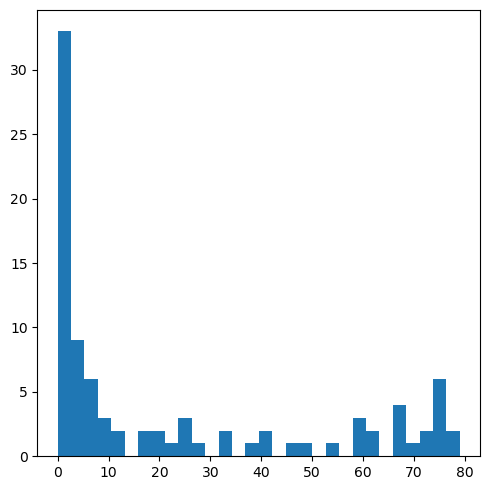

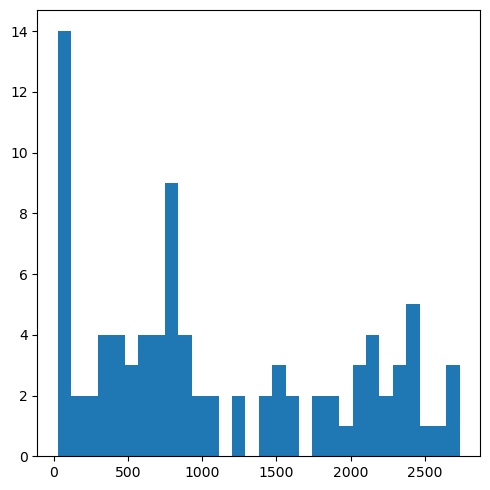

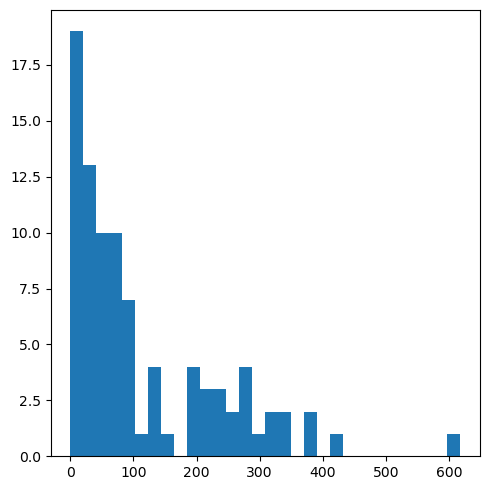

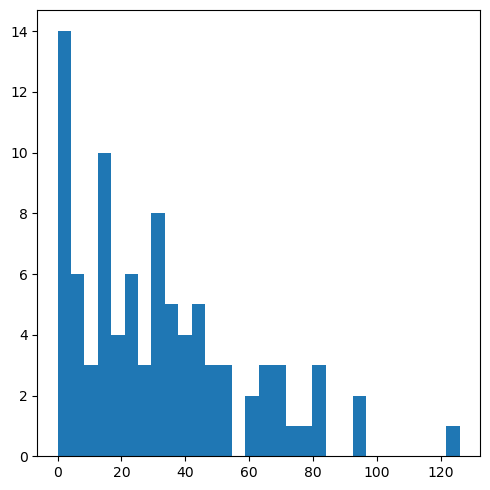

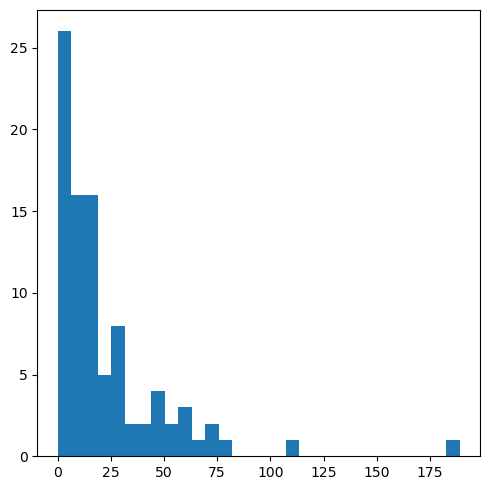

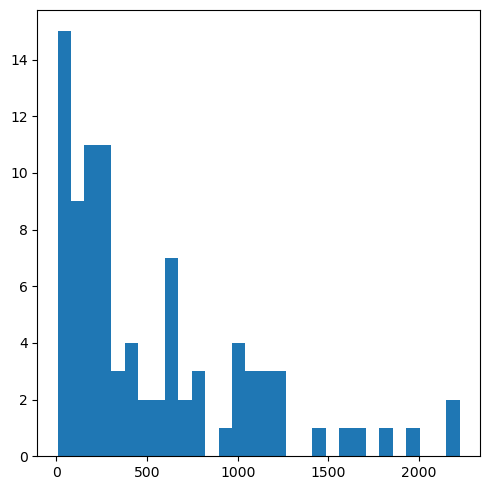

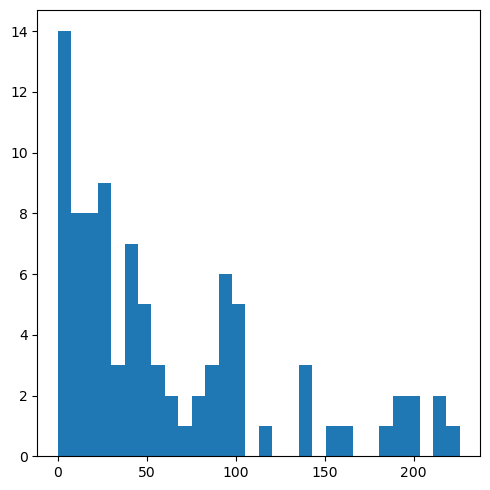

In [93]:
#Step 6: Finding Outliers

fig, axs = plt.subplots(1, 1,
                        figsize =(5, 5), 
                        tight_layout = True)
axs.hist(ndata2023["games_started"], bins = 30)
plt.show()

fig, axs = plt.subplots(1, 1,
                        figsize =(5, 5), 
                        tight_layout = True)
axs.hist(ndata2023["minutes_played"], bins = 30)
plt.show()

fig, axs = plt.subplots(1, 1,
                        figsize =(5, 5), 
                        tight_layout = True)
axs.hist(ndata2023["AST"], bins = 30)
plt.show()

#double checked assist "outlier" but data is valid plenty of values over 600 (possibly newer data, api not updated yet)

fig, axs = plt.subplots(1, 1,
                        figsize =(5, 5), 
                        tight_layout = True)
axs.hist(ndata2023["STL"], bins = 30)
plt.show() 

#double checked steal "outlier" but data is valid: O.G. Anunoby stole the ball the most in 2023 season, with 128 steals.

fig, axs = plt.subplots(1, 1,
                        figsize =(5, 5), 
                        tight_layout = True)
axs.hist(ndata2023["BLK"], bins = 30)
plt.show()

#double checked block "outlier" but data is valid: Brook Lopez blocked the most shots in 2023 season, with 193 blocks.

fig, axs = plt.subplots(1, 1,
                        figsize =(5, 5), 
                        tight_layout = True)
axs.hist(ndata2023["PTS"], bins = 30)
plt.show()

fig, axs = plt.subplots(1, 1,
                        figsize =(5, 5), 
                        tight_layout = True)
axs.hist(ndata2023["TOV"], bins = 30)
plt.show() 

## Project Milestone 5 ------------------------------------------------------------------------------------------------

    Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.

In [94]:
df_types17 = bbdata.dtypes
df_types23 = ndata2023.dtypes
print(df_types17, df_types23)

Unnamed: 0      int64
Year          float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
GS            float64
MP            float64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%          float64
blanl         float64
OWS           float64
DWS           float64
WS            float64
WS/48         float64
blank2        float64
OBPM          float64
DBPM          float64
BPM           float64
VORP          float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB       

In [95]:
import sqlite3
## Inserting Data into SQL Database
conn = sqlite3.connect('basketballdb') 
c = conn.cursor()

# Inserting first dataframe (project mile stone 2)
#bbdata.to_sql('Player_Stats', conn, if_exists='append')

# Inserting second dataframe (project mile stone 3)
#mvpdata.to_sql('MVP_Data', conn, if_exists='append')

# Inserting third dataframe (project mile stone 3)
#multmvp.to_sql('Multiple_MVPs', conn, if_exists='append')

# Inserting fourth dataframe (project mile stone 4)
#ndata2023.to_sql('Data_2023', conn, if_exists='append')

C:\Users\nickx\AppData\Local\Temp\ipykernel_11680\3031023587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final2023.rename(columns=dict,
C:\Users\nickx\AppData\Local\Temp\ipykernel_11680\3031023587.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PlayerData = final2017.append(final2023) #merged data of first and last data tables


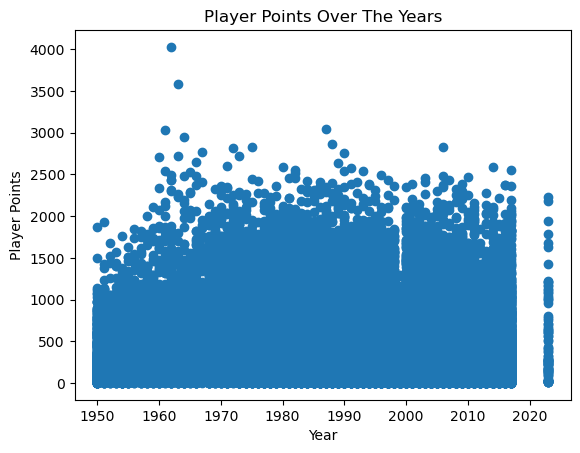

In [96]:
#Visualization 1: Player Points Over Time (Combining First and Last Datasets)
final2023 = ndata2023
final2023['Year'] = final2023['minutes_played'] #new column using season data
final2023['Year'] = 2023.0

final2023 = final2023[["Player", "Year", "field_percent", "three_percent", "two_percent", "effect_fg_percent", "AST", "ft_percent", "PTS"]]
final2017 = bbdata
final2017 = final2017[["Player", "Year", "FG%", "3P%", "2P%", "eFG%", "AST", "FT%", "PTS"]]

#1: Replacing Headers
dict = {'field_percent': 'FG%', 
        'three_percent': '3P%', 
        'two_percent': '2P%', 
        'effect_fg_percent': 'eFG%'}
 
final2023.rename(columns=dict,
          inplace=True)

PlayerData = final2017.append(final2023) #merged data of first and last data tables

plt.scatter(PlayerData.Year, PlayerData.PTS)
plt.title("Player Points Over The Years")
plt.xlabel("Year")
plt.ylabel("Player Points")
plt.show()

Text(0, 0.5, 'Player Point Frequency')

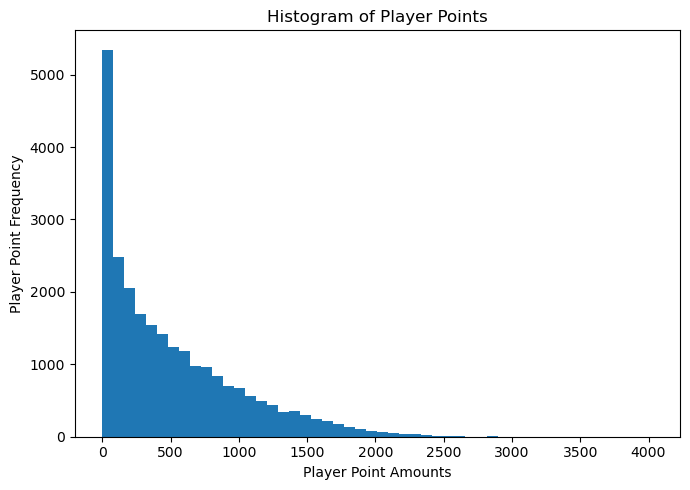

In [97]:
#Visualization 2:
#Histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7, 5), 
                        tight_layout = True)
 
axs.hist(PlayerData["PTS"], bins = 50)
plt.title("Histogram of Player Points")
plt.xlabel("Player Point Amounts")
plt.ylabel("Player Point Frequency")

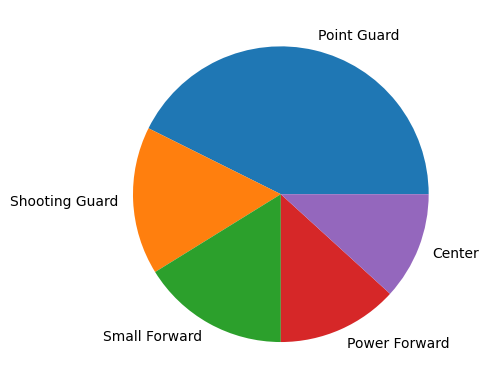

In [98]:
#Visualization 3: Proportion of MVP Winner Positions

#Pie Chart
y = mvpdata["Position"].value_counts()
mylabels = ["Point Guard", "Shooting Guard", "Small Forward", "Power Forward", "Center"]

plt.pie(y, labels = mylabels)
plt.show() 

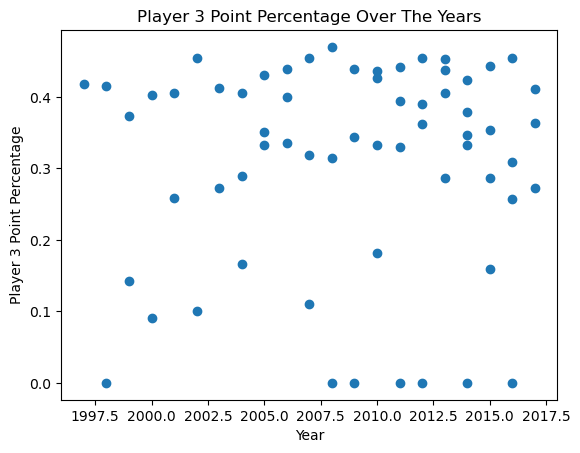

In [99]:
#Visualization 4: 3 Point Percentage Stats for MVP WInners

MVPPlayerData = PlayerData.loc[PlayerData['Player'].isin(multmvp["Player"])] #merged first, third and fourth data tables
MVPPlayerData

plt.scatter(MVPPlayerData.Year, MVPPlayerData["3P%"])
plt.title("Player 3 Point Percentage Over The Years")
plt.xlabel("Year")
plt.ylabel("Player 3 Point Percentage")
plt.show()

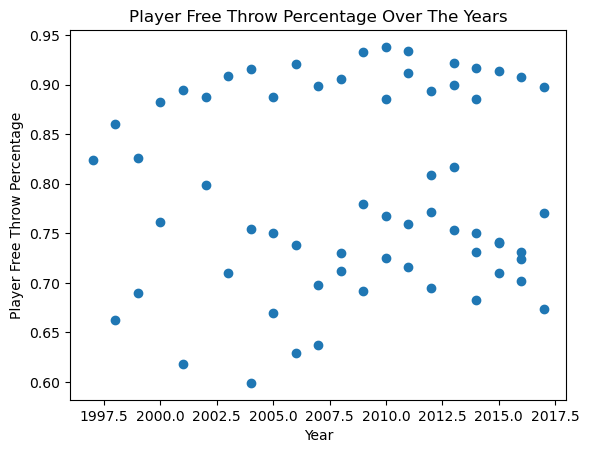

In [100]:
#Visualization 5: Free Throw Stats for MVP WInners

plt.scatter(MVPPlayerData.Year, MVPPlayerData["FT%"])
plt.title("Player Free Throw Percentage Over The Years")
plt.xlabel("Year")
plt.ylabel("Player Free Throw Percentage")
plt.show()

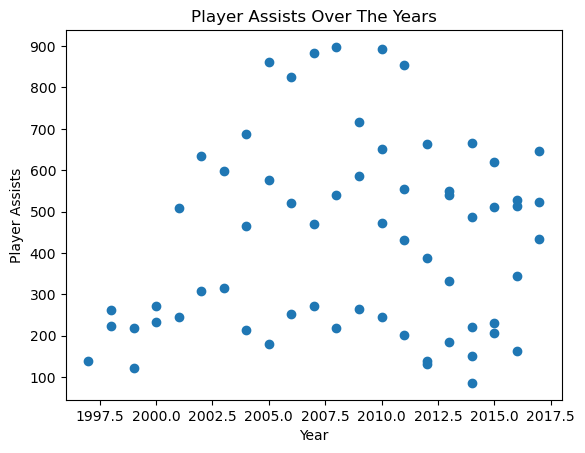

In [101]:
#Visualization 6: Assist Stats for MVP WInners

plt.scatter(MVPPlayerData.Year, MVPPlayerData["AST"])
plt.title("Player Assists Over The Years")
plt.xlabel("Year")
plt.ylabel("Player Assists")
plt.show()

Provide 250-500-word summary of what you learned and had to do to complete the project. In your write-up, make sure to address the ethical implications of cleansing data and your project topic

##### Summary Visualization 1:
    For the first visualization we used a dataset that was comprised of the first data table in our database which is player statistics for basketball seasons of 1950 until 2017 and the fourth data table which includes data for the 2023 basketball season. The data was combined top and bottom where the 2023 data was added to the bottom of the other dataset. Before the datasets were joined together, for formatting reasons each one was subsetted to only include the player name, the season year, field goal percentage, three point percentage, two point percentage, effective field goal percentage, total assists, free throw percentage and total points.
    Once our final merged dataset was created we were able to create our first visualization. The first visualization is a record of every player's total points in each season. The purpose of this graph is to show the trends of point statistics over time. As you can see from the graph, the amount of total points a player gets over the years does seem to be increasing constantly over the years but the varaibility (outliers that go above the average to be exact) is less common.
    
##### Summary Visualization 2:

    The second visualization still utilizes the merged data from the first visualization. In this visualization we are looking at a histogram of all the total points players scored each season. We previously provided a histogram of total points but that histogram did not included the data from 2023. This histogram includes all the data that we have gathered. Although, there doesn't seem to be a different trend than the previous histogram that was created. We still see that the amount of points is still skewed to the right by a few players who have outscored their opponents by a large number. But for the most part, players tend to score a total amount of points closer to the left side of the scale.
    
##### Summary Visualization 3:

    Our third visualization only utilizes one table from our database and it is the MVP player data. This is a list of all players that have recieved an MVP award since the award started being given to players. To analyze what type of player tends to win this award we want to use the player's position as the profile characteristic. If you are unfamiliar with basketball, there are five main positions that players are categorized by. They are either a point guard, shooting guard, small forward, power forward or a center. A player can play multiple positions but there is one position that they are listed as (usually when drafted or as a summary of their career). Taking this information, we created a pie chart that shows how often each player of each position has won an MVP award. Judging by the results, more often than not, a point guard is the winner of the MVP award.

##### Summary Visualization 4, 5 and 6:

    For the last three visualizations we create a new merged dataset that utilizates data from the first and last data tables of our database as well as the third table. We use the formatted merged data from our first two visualizations and then use our third data table of mutliple MVP award winning players to subset our data once again. We then use that third data table to filter through our data and only include data from players who have won multiple MVP awards (objectively the more successful basketball players). Now with our MVP player data, we can analyze their statistics over the years. In the visualizations we looked at 3 point percentage over the years, free throw percentage and total assist for each player over multiple seasons. We find that when it comes to MVP winners, they consistently have had relatively high 3 point and free throw percentages that haven't changed much but the amount of assists per season has been shown to increase over the years meaning that MVP winners have been increasing the amount of assists they have per season and having high assist numbers is a growing trait of a good basketball player.
    
##### Overall Conclusion of Finds:

    In summary, we looked at different characteristics that might particularly show that a basketball player will be "great" in nature. We defined this greatness by the merit of winning MVP award, as being deemed the most valuable player of a season by fans and other players is a great indication of whether or not a player is a great basketball player. We find that there is a shift in what makes a basketball player great. While in the past, a great player was seen as one that scored the most or had higher percentages of accuracy, we see a rising trait of good players who create opportunities for the rest of their team as well (assists). We confirm this finding by also seeing that when it comes to winning MVP award, the point guard is the most common recipient of that award. This confirms our previous findings, especially considering that one of the main roles of a point guard is facilitating offensive strategies and keeping the team coordinated.
    
##### Ethical implications of data wrangling

    As far as ethics are concerned with this dataset. There isn't really that many instances of extremely personal information being taken from these individuals. Possibly their name and age can be taken as personal information but these men are also professional basketball players who appear on television on multiple occasions. Their personal information can easily be found online with a simple google search so I don't beleive that there is much of a breach of personal information here.